<a href="https://colab.research.google.com/github/RDGopal/IB9CW0-Text-Analytics/blob/main/Cleaning_and_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/RDGopal/IB9CW0-Text-Analytics/main/Data/sms_spam.csv')

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for each text
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to get sentiment score for each message in the DataFrame
df['vader_sentiment_rawtext'] = df['text'].apply(get_sentiment)

# Display the first few rows to verify sentiment scores
df[['text', 'vader_sentiment_rawtext']].head()


In [4]:
# Put it all into a function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return ' '.join(tokens)


In [5]:
df['text1'] = df['text'].apply(preprocess_text)

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for each text
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to get sentiment score for each message in the DataFrame
df['vader_sentiment_cleantext'] = df['text1'].apply(get_sentiment)

# Display the first few rows to verify sentiment scores
df[['text', 'vader_sentiment_cleantext']].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,vader_sentiment_cleantext
0,"Go until jurong point, crazy.. Available only ...",0.4019
1,Ok lar... Joking wif u oni...,0.4767
2,Free entry in 2 a wkly comp to win FA Cup fina...,0.7964
3,U dun say so early hor... U c already then say...,0.0000
4,"Nah I don't think he goes to usf, he lives aro...",-0.1027


In [ ]:
df[['vader_sentiment_rawtext', 'vader_sentiment_cleantext']]

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

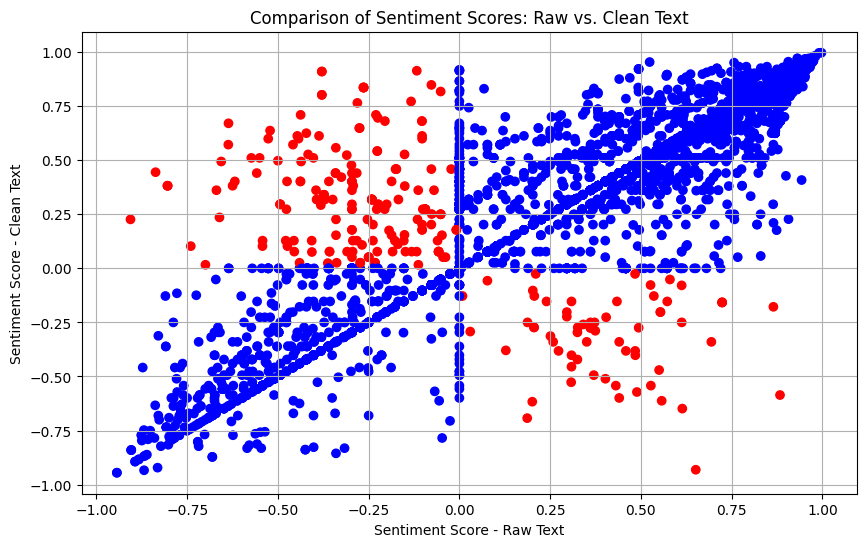

In [24]:
# Create a color list based on condition
colors = ['red' if (x < 0 and y > 0) or (x > 0 and y < 0) else 'blue' for x, y in zip(df['vader_sentiment_rawtext'], df['vader_sentiment_cleantext'])]

plt.figure(figsize=(10, 6))

# Plotting using matplotlib directly
plt.scatter(df['vader_sentiment_rawtext'], df['vader_sentiment_cleantext'], c=colors)

# Customizing the plot
plt.title('Comparison of Sentiment Scores: Raw vs. Clean Text')
plt.xlabel('Sentiment Score - Raw Text')
plt.ylabel('Sentiment Score - Clean Text')
plt.grid(True)
plt.show()


In [17]:
# Calculate the mean of the columns
print(df['vader_sentiment_rawtext'].mean())
print(df['vader_sentiment_cleantext'].mean())

0.19061661284535344
0.21982475780409044


In [18]:
# Calculate the standard deviation of the columns
print(df['vader_sentiment_rawtext'].std())
print(df['vader_sentiment_cleantext'].std())

0.416131003076066
0.3932765030747478
